# Подключаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import json

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = (10, 10)

# Загружаем датасет

In [2]:
file_name = 'USvideos.csv'
my_df = pd.read_csv(file_name, index_col='video_id')
my_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Оптимизация данных

In [3]:
def optimize_dataframe(df):
  # iterate over all of the columns in the dataframe
  for col in df.columns:
    # get the current data type of the column
    dtype = df[col].dtype
    
    # if the data type is object (e.g. string), try to convert it to a numeric data type
    if dtype == 'object':
      try:
        df[col] = pd.to_numeric(df[col])
      except ValueError:
        pass
        
    # if the data type is numeric, find the smallest integer data type that can accommodate the maximum value in the column
    elif np.issubdtype(dtype, np.number):
      max_val = df[col].max()
      
      if max_val < np.iinfo(np.int8).max:
        df[col] = df[col].astype(np.int8)
      elif max_val < np.iinfo(np.int16).max:
        df[col] = df[col].astype(np.int16)
      elif max_val < np.iinfo(np.int32).max:
        df[col] = df[col].astype(np.int32)
      else:
        df[col] = df[col].astype(np.int64)
        
  return df

In [4]:
my_df = optimize_dataframe(my_df)
my_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Типы данных


In [5]:
print(my_df.shape)
print(my_df.dtypes)

(20967, 15)
trending_date             object
title                     object
channel_title             object
category_id                 int8
publish_time              object
tags                      object
views                      int32
likes                      int32
dislikes                   int32
comment_count              int32
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


Отберем числовые колонки

In [6]:
df_numeric = my_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['category_id' 'views' 'likes' 'dislikes' 'comment_count']


Отберем нечисловые колонки

In [7]:
df_non_numeric = my_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['trending_date' 'title' 'channel_title' 'publish_time' 'tags'
 'thumbnail_link' 'comments_disabled' 'ratings_disabled'
 'video_error_or_removed' 'description']


Исправим формат данных даты и времени

In [8]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_df['trending_date'].head()

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
5qpjK5DgCt4   2017-11-14
puqaWrEC7tY   2017-11-14
d380meD0W0M   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [9]:
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_df['publish_time'].head()

video_id
2kyS6SvSYSE   2017-11-13 17:13:01
1ZAPwfrtAFY   2017-11-13 07:30:00
5qpjK5DgCt4   2017-11-12 19:05:24
puqaWrEC7tY   2017-11-13 11:00:04
d380meD0W0M   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

Разделим дату и время публикации на разные колонки

In [10]:
my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time
my_df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
video_id,,
2kyS6SvSYSE,2017-11-13,17:13:01
1ZAPwfrtAFY,2017-11-13,07:30:00
5qpjK5DgCt4,2017-11-12,19:05:24
puqaWrEC7tY,2017-11-13,11:00:04
d380meD0W0M,2017-11-12,18:01:41


Исправим формат данных для числовых признаков

In [11]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    my_df[column] = my_df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    my_df[column] = my_df[column].astype(str)

Добавим колонку 'category'

In [12]:
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [13]:
my_df.insert(4, 'category', my_df['category_id'].map(id_to_category))
my_df[['category_id', 'category']].head()

,category_id,category
video_id,,
2kyS6SvSYSE,22,People & Blogs
1ZAPwfrtAFY,24,Entertainment
5qpjK5DgCt4,23,Comedy
puqaWrEC7tY,24,Entertainment
d380meD0W0M,24,Entertainment


# Очистка данных

Визуализируем пропущенные значения при помощи тепловой карты

<AxesSubplot:ylabel='video_id'>

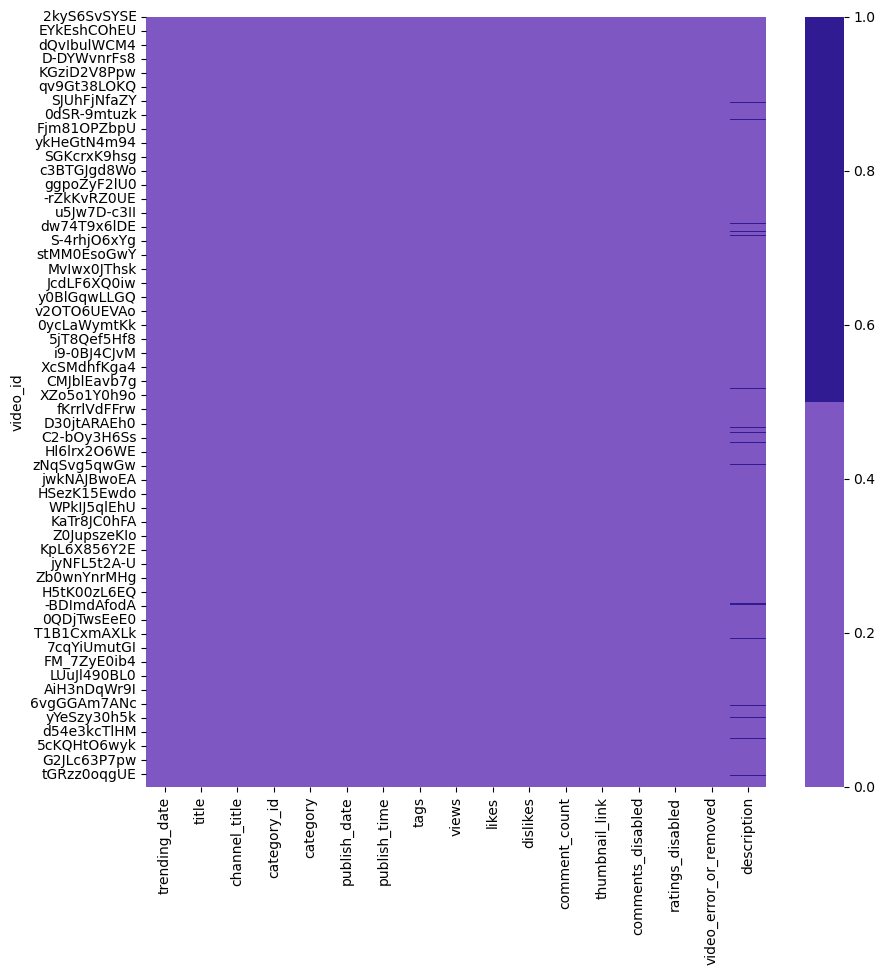

In [14]:
cols = my_df.columns
colours = ['#7e57c2', '#311b92'] 
sns.heatmap(my_df[cols].isnull(), cmap=sns.color_palette(colours))

По полученной тепловой карте заметно, что признак 'description' содержит незначительное количество пустых строк. Убедимся в этом с помощью процентного списка

In [15]:
for col in my_df.columns:
    pct_missing = np.mean(my_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

trending_date - 0%
title - 0%
channel_title - 0%
category_id - 0%
category - 0%
publish_date - 0%
publish_time - 0%
tags - 0%
views - 0%
likes - 0%
dislikes - 0%
comment_count - 0%
thumbnail_link - 0%
comments_disabled - 0%
ratings_disabled - 0%
video_error_or_removed - 0%
description - 2%


У признака 'description' отсутствует 2% значений, что действительно является незначительным. Заполним пропущенные записи строкой 'NULL'

In [16]:
my_df['description'] = my_df['description'].fillna('NULL')

Проверим, что пропущенных записей больше нет

In [17]:
for col in my_df.columns:
    pct_missing = np.mean(my_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

trending_date - 0%
title - 0%
channel_title - 0%
category_id - 0%
category - 0%
publish_date - 0%
publish_time - 0%
tags - 0%
views - 0%
likes - 0%
dislikes - 0%
comment_count - 0%
thumbnail_link - 0%
comments_disabled - 0%
ratings_disabled - 0%
video_error_or_removed - 0%
description - 0%


In [18]:
my_df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id', 'category',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype='object')

# Обнаружение выбросов
Построим коробчатую диаграмму для каждого числового признака 

<AxesSubplot:>

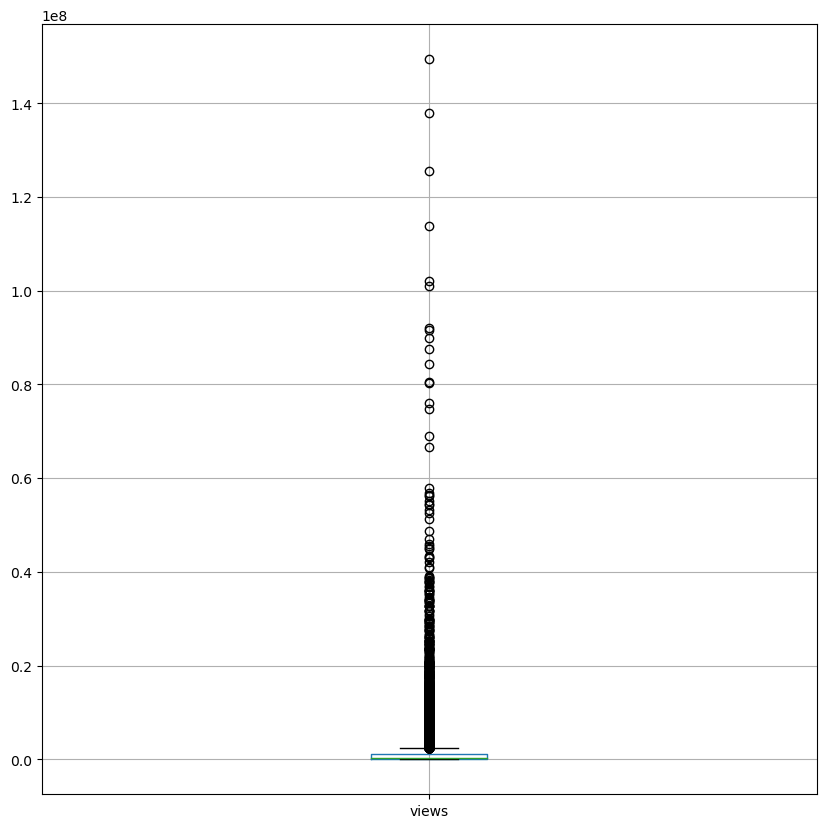

In [19]:
my_df.boxplot(column=['views'])

<AxesSubplot:>

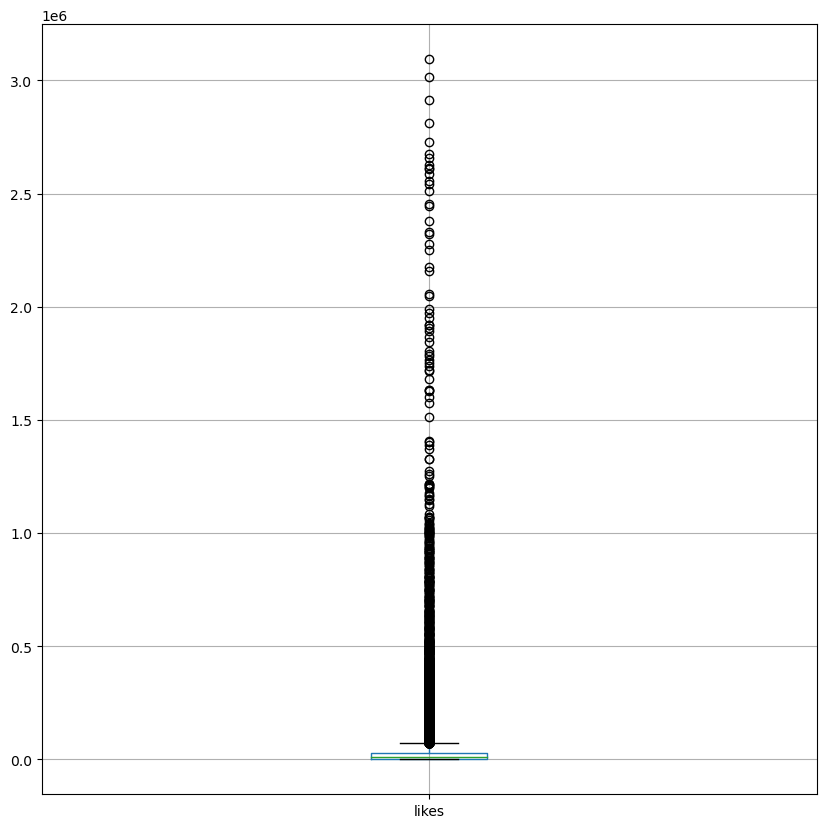

In [20]:
my_df.boxplot(column=['likes'])

<AxesSubplot:>

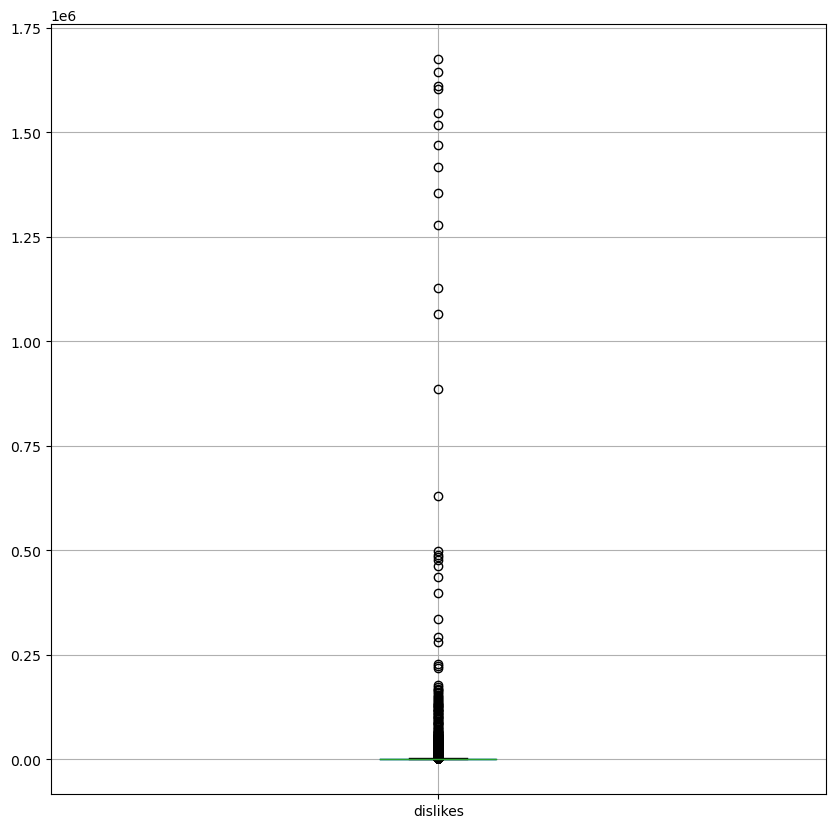

In [21]:
my_df.boxplot(column=['dislikes'])

<AxesSubplot:>

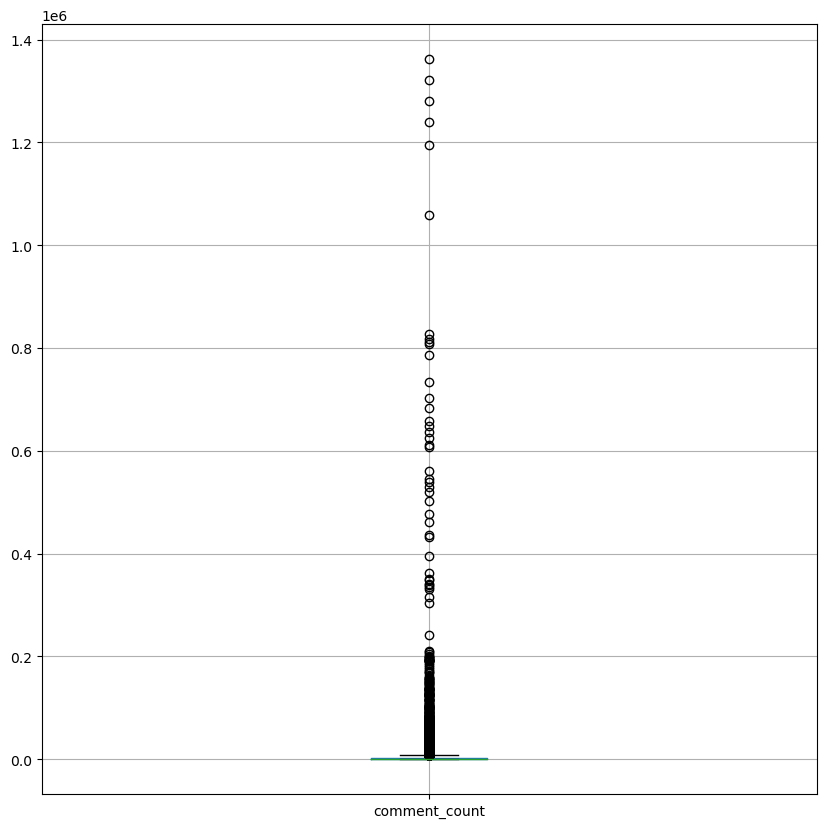

In [22]:
my_df.boxplot(column=['comment_count'])

По полученным диаграммам видно, что в числовых данных отсутствуют выбросы.
Убедимся, что категориальные признаки также не содержат выбросов

In [23]:
my_df['category_id'].describe()

count     20967
unique       16
top          24
freq       4870
Name: category_id, dtype: object

Действительно, в категориальных признаках не содержится выбросов

# Обнаружение неинформативных признаков
Определим какие признаки содержат более 95% строк с одинаковыми значениями

In [24]:
num_rows = len(my_df.index)
low_information_cols = [] #

for col in my_df.columns:
    cnts = my_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

comments_disabled: 98.27348%
False    20605
True       362
Name: comments_disabled, dtype: int64

ratings_disabled: 99.37521%
False    20836
True       131
Name: ratings_disabled, dtype: int64

video_error_or_removed: 99.98092%
False    20963
True         4
Name: video_error_or_removed, dtype: int64



Получаем следующий список признаков: 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'. Так как признаки неинформативные удалим их

In [25]:
drop_cols = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
my_df = my_df.drop(drop_cols, 1)
my_df.head()

C:\Users\Polina\AppData\Local\Temp\ipykernel_12340\1811421179.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  my_df = my_df.drop(drop_cols, 1)


,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
video_id,,,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...


# Избавление от дубликатов

Проверим, содержатся ли в данных дубликаты

In [26]:
my_df.isna().sum()

trending_date     0
title             0
channel_title     0
category_id       0
category          0
publish_date      0
publish_time      0
tags              0
views             0
likes             0
dislikes          0
comment_count     0
thumbnail_link    0
description       0
dtype: int64

Явных дубликатов нет, но так как видео может держаться в трендаах более одного дня об одном видео может быть более одной записи. Удалим все дубликаты и оставим только последнюю запись с самой новой статистикой

In [27]:
extra_df = my_df # сохраним датасет с дубликатами для дальнейшего анализа
print(my_df.shape)
my_df = my_df[~my_df.index.duplicated(keep='last')]
print(my_df.shape)
my_df.index.duplicated().any()
print(extra_df.shape)

(20967, 14)
(4416, 14)
(20967, 14)


В результате избавления от дубликатов получаем набор данных из 4416 записей без повторений

# Корреляционный анализ и тепловая карта

In [28]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = my_df[keep_columns].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.836400,0.530692,0.574181
likes,0.836400,1.000000,0.476504,0.695842
dislikes,0.530692,0.476504,1.000000,0.853382
comment_count,0.574181,0.695842,0.853382,1.000000


C:\Users\Polina\AppData\Local\Temp\ipykernel_12340\1504570241.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False)
C:\Users\Polina\AppData\Local\Temp\ipykernel_12340\1504570241.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False)


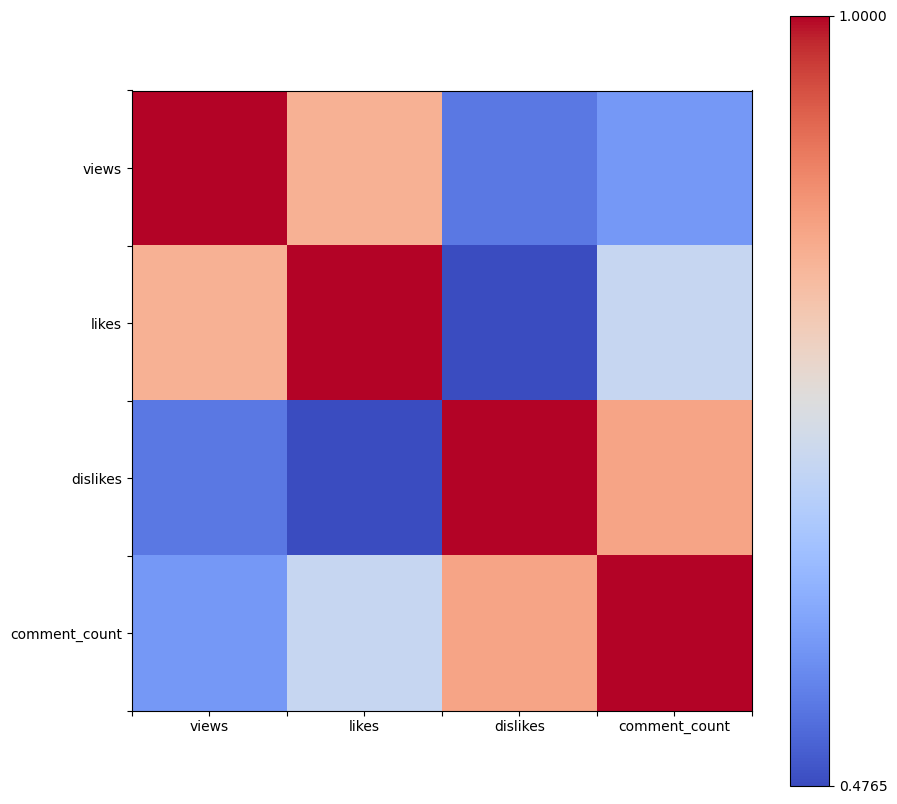

In [29]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

# Обработка данных
Гипотезы:
1. Чаще всего выкладывают видео категории "Развлечения"
2. Больше всего видео выкладывают во второй половине дня: с 12:00 до 00:00
3. Существует линейная зависимость между количеством лайов и просмотров
4. Лайки и дизлайки имеют обратную корреляцию

Проверим первую гипотезу

Text(0.5, 1.0, 'Catogories of trend videos')

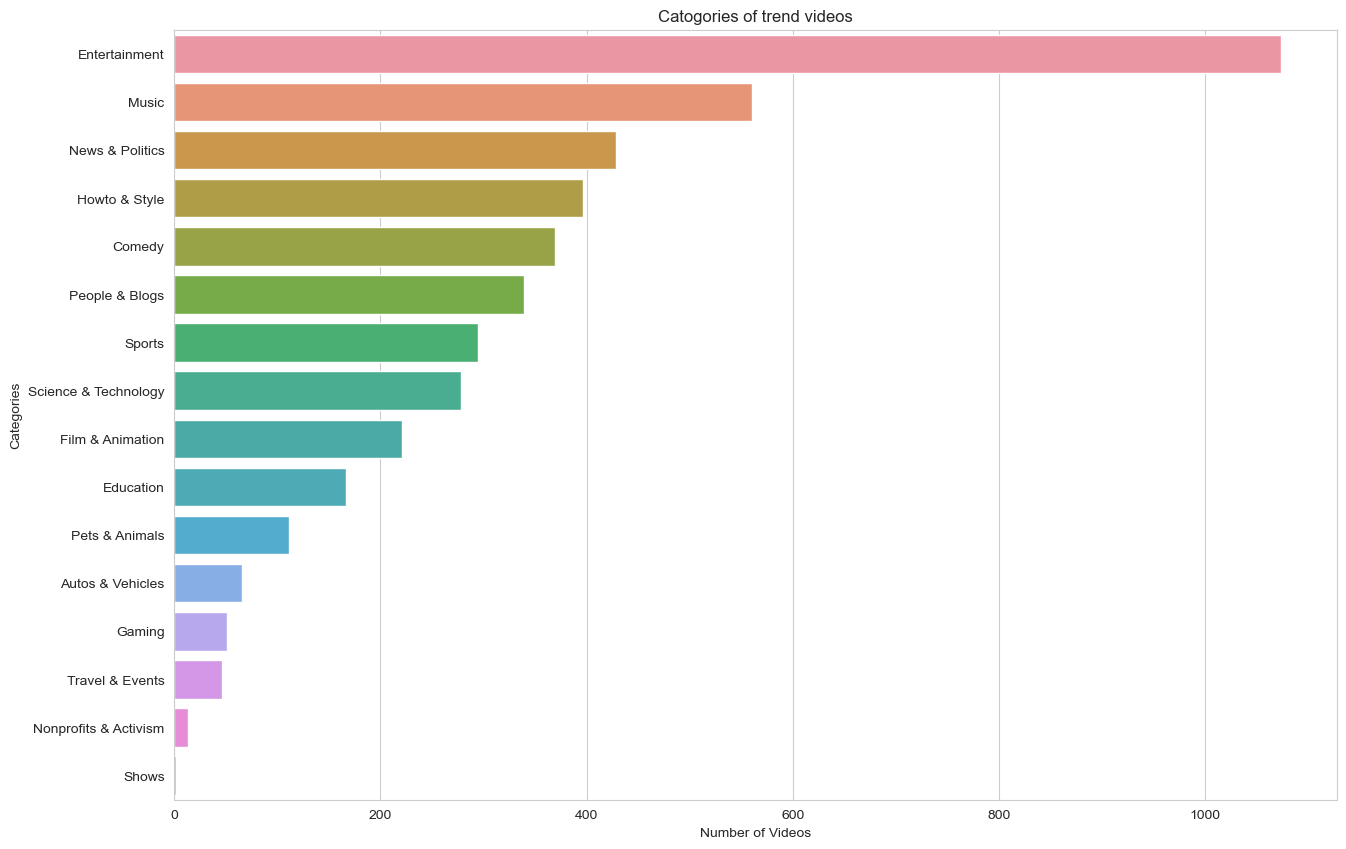

In [30]:
cat_df = my_df['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df['index'],x=cat_df['category'], data=cat_df,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos")

Гипотеза 1 подтвердилась.

Проверим гипотезу 2.

In [31]:
my_df[['hour','min','sec']] = my_df['publish_time'].astype(str).str.split(':', expand=True).astype(int)

C:\Users\Polina\AppData\Local\Temp\ipykernel_16868\1994182704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[['hour','min','sec']] = my_df['publish_time'].astype(str).str.split(':', expand=True).astype(int)
C:\Users\Polina\AppData\Local\Temp\ipykernel_16868\1994182704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[['hour','min','sec']] = my_df['publish_time'].astype(str).str.split(':', expand=True).astype(int)
C:\Users\Polina\AppData\Local\Temp\ipykernel_16868\1994182704.py:1: SettingW

TOP 5 Hour values
16    395
17    392
15    333
18    317
14    310
Name: hour, dtype: int64


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

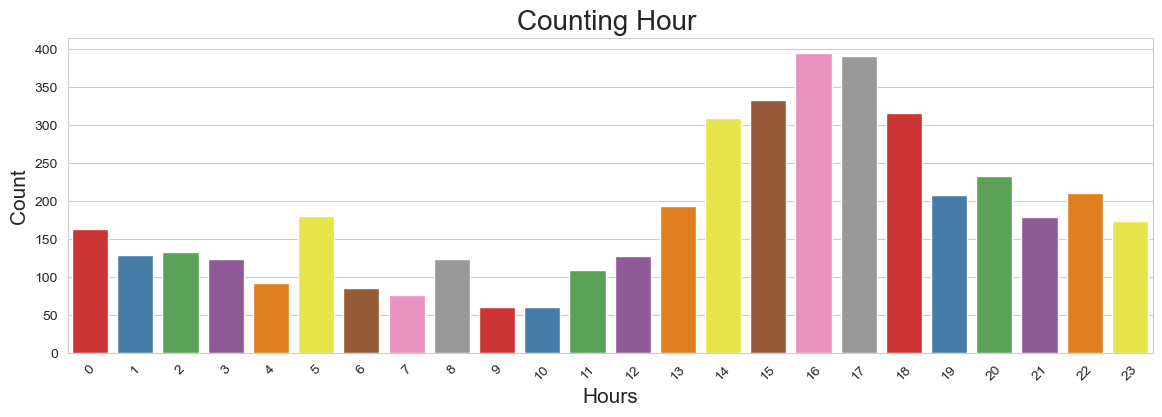

In [32]:
print("TOP 5 Hour values")
print(my_df['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=my_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Видим, что пик количества выкладываемых видео приходится на 16 часов. Больше всего видео выкладывается в промежуток с 14 по 18 часов. Гипотеза 2 подтвердилась.
Проверим гипотезу 3.
Сначала убедимся, что лайки и просмотры подчиняются нормальному распределению

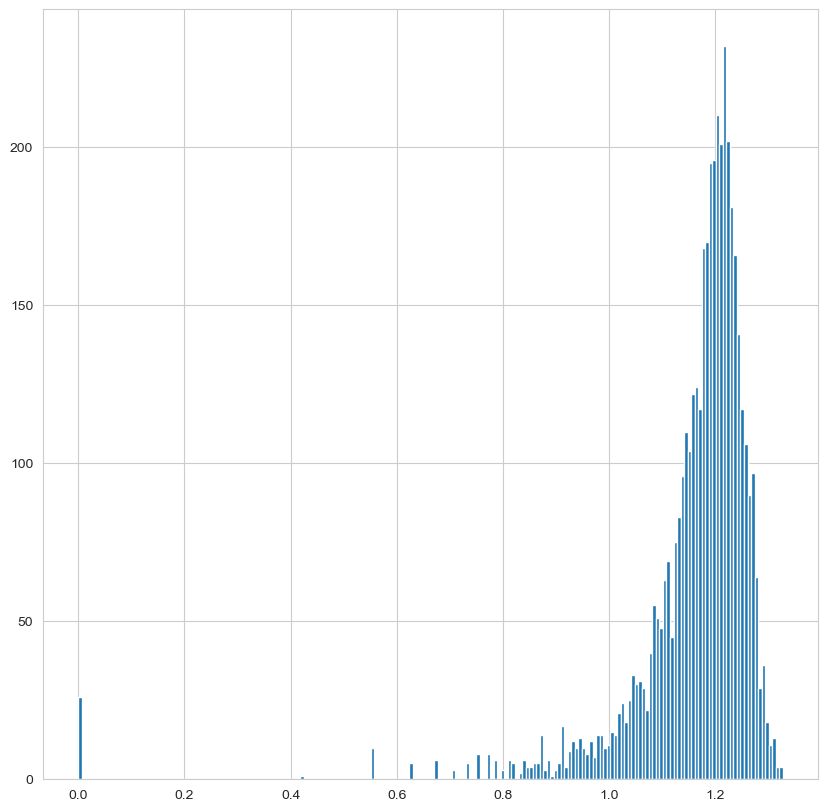

In [47]:
my_df['likes'].hist(bins=200)
plt.show()

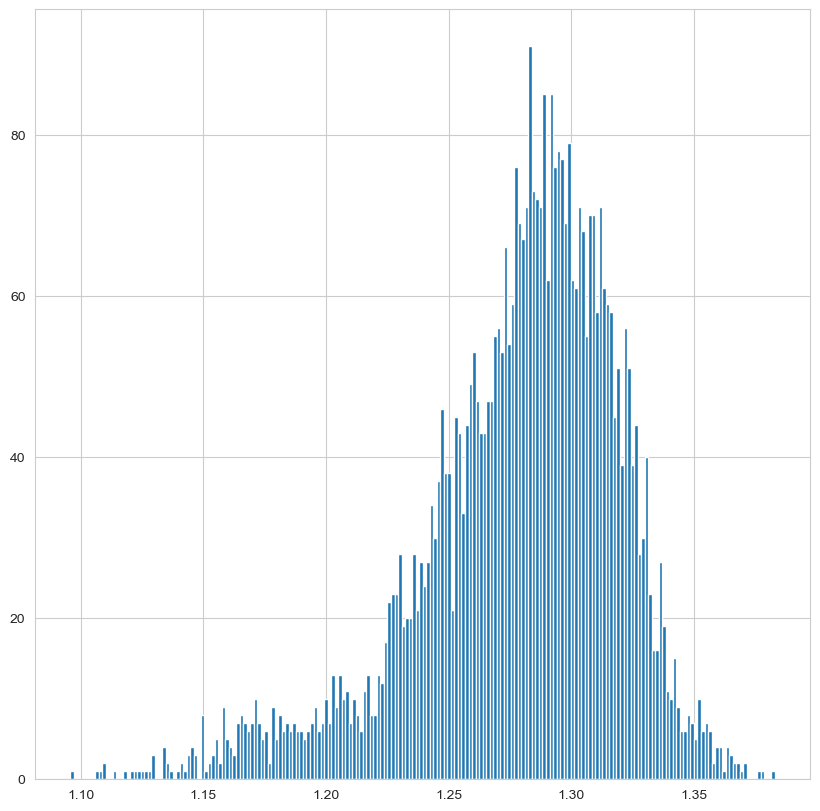

In [49]:
my_df['views'].hist(bins=200)
plt.show()

<AxesSubplot:xlabel='0', ylabel='1'>

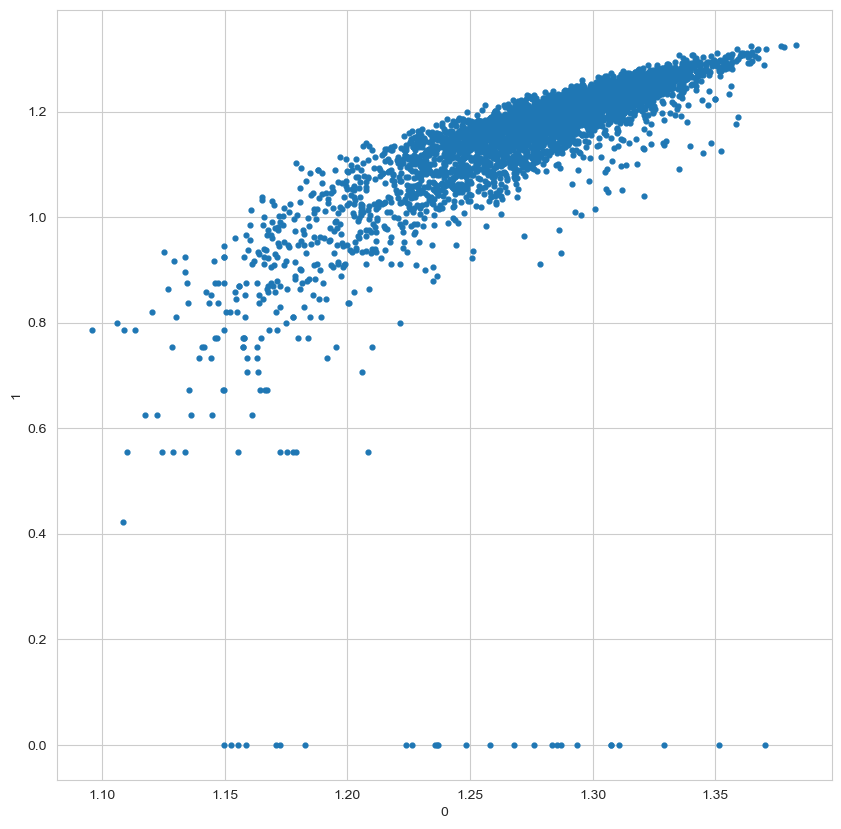

In [51]:
xs = my_df['views']
ys = my_df['likes']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)

Гипотеза 3 не подтвердилась. Зависимость лайков от просмотров y=sqrt(x)
Проверим гипотезу 4

In [56]:
import random
def jitter(limit):
    return lambda x: random.uniform(-limit, limit) + x

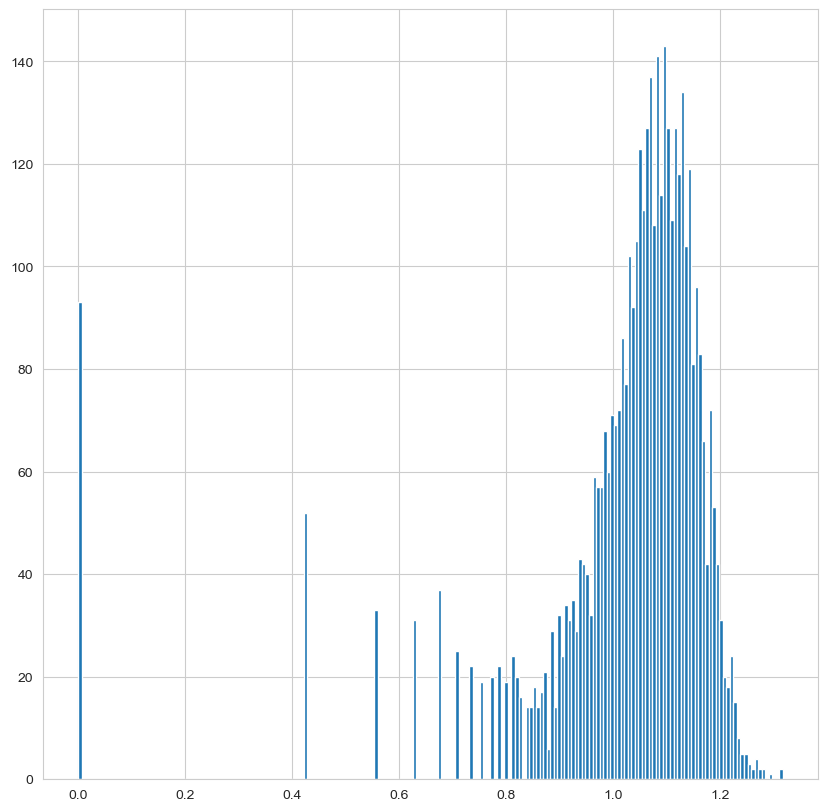

In [66]:
my_df['dislikes'].hist(bins=200)
plt.show()

<AxesSubplot:xlabel='0', ylabel='1'>

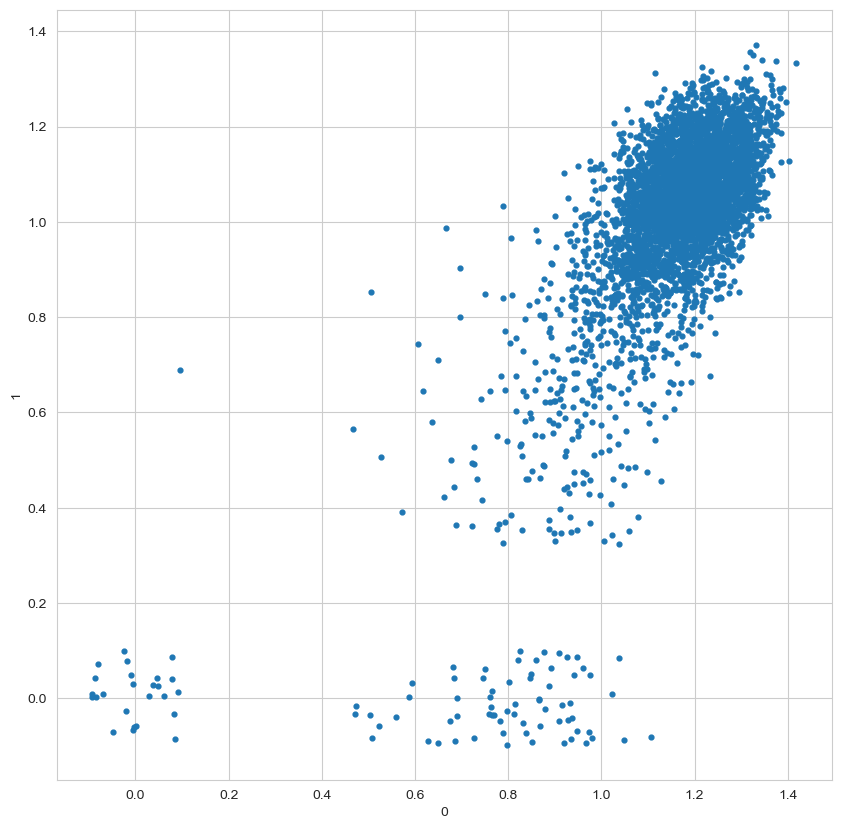

In [62]:
xs = my_df['likes'].agg(jitter(0.1))
ys = my_df['dislikes'].agg(jitter(0.1))
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)

In [70]:
from scipy import stats
def check_correlation_name(df):
  # calculate the probability of the word "white" in the "winer" column
  white_prob = df['likes']
  
  # convert the probability to a Pandas Series object
  white_prob = pd.Series(white_prob)
  
  # drop any rows from the DataFrame that contain missing or invalid values
  df = df.dropna()
  
  # convert the "oppening_name" column to a categorical data type
  df['dislikes'] = pd.Categorical(df['dislikes'])
  print(stats.pearsonr(white_prob, df['dislikes']))

check_correlation_name(my_df)

PearsonRResult(statistic=0.8170484019330932, pvalue=0.0)


Гипотеза 4 не подтвердилась. Корреляция Пирсона между лайками и дизлайками = 0,82, следовательно они линейно зависимы. 

In [33]:
my_df['interaction'] = my_df['likes']+my_df['dislikes']
my_df.head()

C:\Users\Polina\AppData\Local\Temp\ipykernel_12340\978411776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['interaction'] = my_df['likes']+my_df['dislikes']


,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,interaction
video_id,,,,,,,,,,,,,,,
9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,2017-11-13,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,New England Patriots returner Dion Lewis blast...,680
Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,With Justice League approaching fast we rewatc...,8307
goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,2017-11-12,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,A strong 7.2-magnitude earthquake has rattled ...,334
8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,I think Sarah Millican was very excited for th...,16352
IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,One and a half years after the surgery that tr...,1970
